
----
 _**Trabajo**: Cazando al oso: Informe CTI sobre NoName057(16)_<br>
_**Autores**: Ignacio José Mestre Villagrasa y Javier Domínguez Martín<br>_
_**Centro**: Kschool<br>_
_**Tutor**: Iván Portillo Morales_

<center>
<img src='../Images/osoAk.png' height=400px/>
</center>

Este estudio se utiliza para investigar los posibles patrones existentes dentros de los targets de NoName0r57(16), se hace uso de ../data/database.db donde se encuentran los diferentes targets que han sido recopilados. Estos targets no son todos los de NoName, aunque si se considera una muestra bastante extensa del arsenal de objetivos de NoName.

#

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import sqlite3
import json

In [2]:
AMARILLO = "#FFD700" #Kschool color

In [3]:

con = sqlite3.connect('../data/database.db')
query = "SELECT * FROM regs"
df = pd.read_sql(query, con)
con.close()

print(f"[*] Total de registros: {len(df)}")
df.head()

[*] Total de registros: 7094


,host,host_id,request_id,schema,last_time_seen
0,ktelthes.gr,65fad1bc1b643fb958e2a420,65fad1bc1b643fb958e2a421,"{""target_id"": ""65fad1bc1b643fb958e2a420"", ""req...",2024-04-15 08:42:32
1,ktelthes.gr,65fad1bc1b643fb958e2a420,65fad1bc1b643fb958e2a422,"{""target_id"": ""65fad1bc1b643fb958e2a420"", ""req...",2024-04-15 08:42:32
2,ktelthes.gr,65fad1bc1b643fb958e2a420,65fad1bc1b643fb958e2a423,"{""target_id"": ""65fad1bc1b643fb958e2a420"", ""req...",2024-04-15 08:42:32
3,ktelthes.gr,65fad1bc1b643fb958e2a420,65fad1bc1b643fb958e2a424,"{""target_id"": ""65fad1bc1b643fb958e2a420"", ""req...",2024-04-15 08:42:32
4,ktelthes.gr,65fad1bc1b643fb958e2a420,65fad1bc1b643fb958e2a425,"{""target_id"": ""65fad1bc1b643fb958e2a420"", ""req...",2024-04-15 08:42:32


#
----

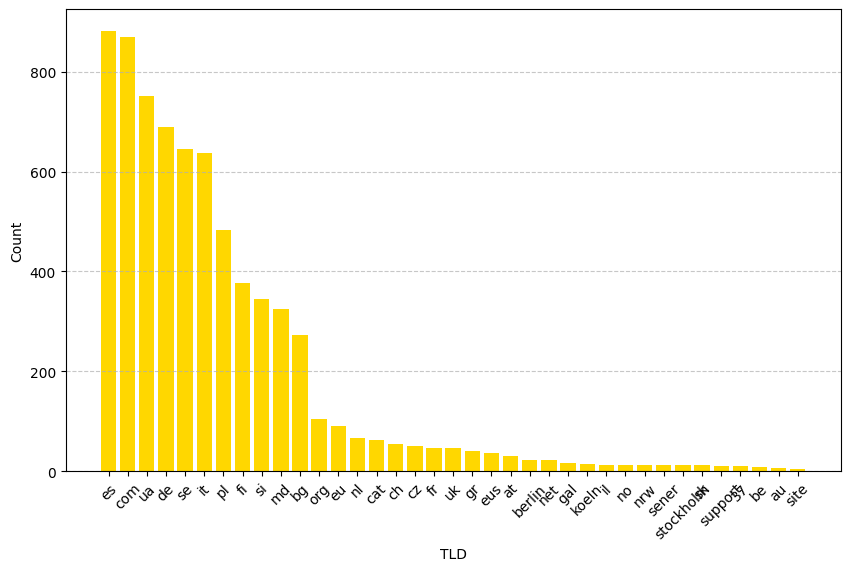

In [4]:
df['tld'] = df['host'].apply(lambda x: x.split('.')[-1])

tld_distribution = df['tld'].value_counts()

tld_distribution_df = tld_distribution.reset_index()
tld_distribution_df.columns = ['tld', 'count']

plt.figure(figsize=(10, 6))
plt.bar(tld_distribution_df['tld'], tld_distribution_df['count'], color=AMARILLO)
plt.xlabel('TLD')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#
---

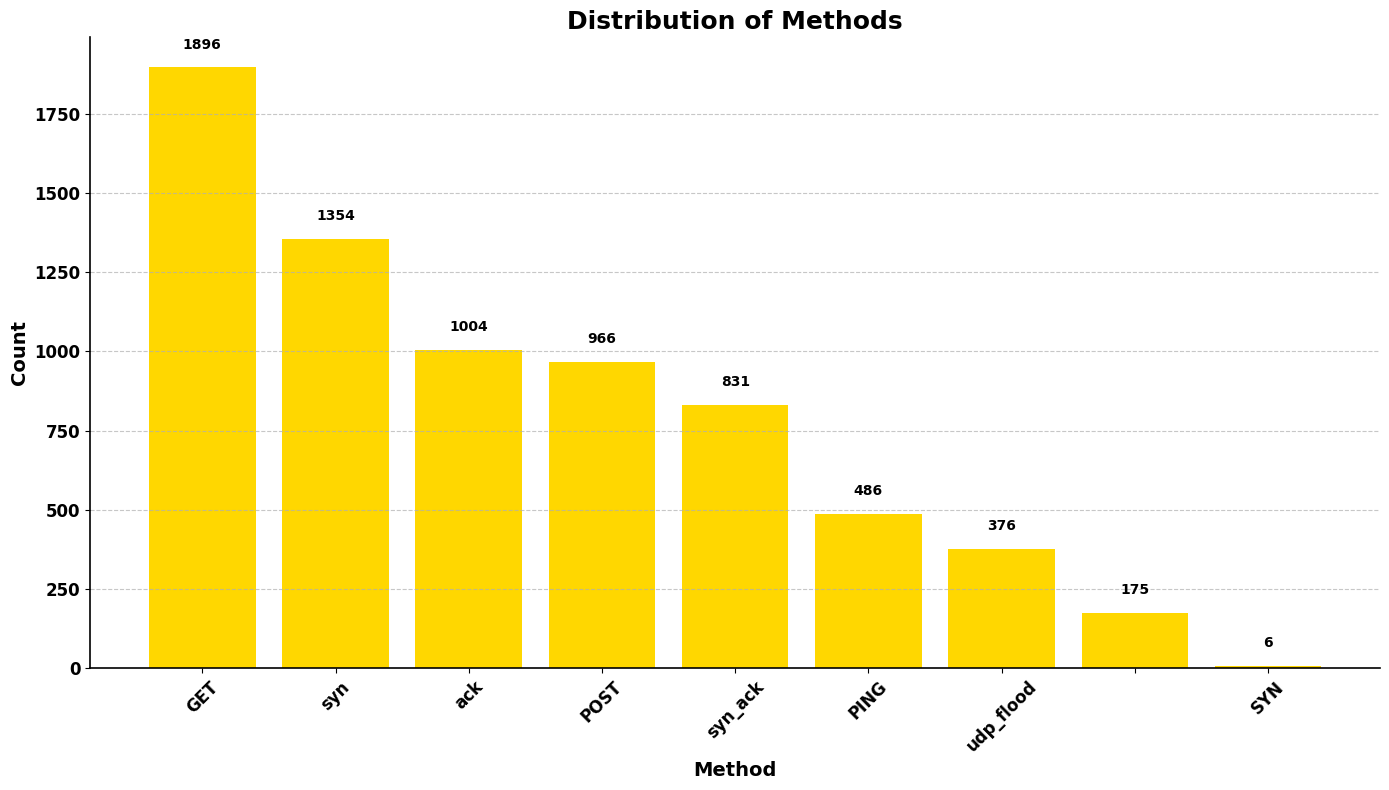

In [5]:
df['schema_method'] = df['schema'].apply(lambda x: json.loads(x).get('method', 'Unknown'))

method_distribution = df['schema_method'].value_counts()

method_distribution_df = method_distribution.reset_index()
method_distribution_df.columns = ['method', 'count']

plt.figure(figsize=(14, 8))

bars = plt.bar(method_distribution_df['method'], method_distribution_df['count'], color=AMARILLO)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontweight='bold')

plt.xlabel('Method', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Methods', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()

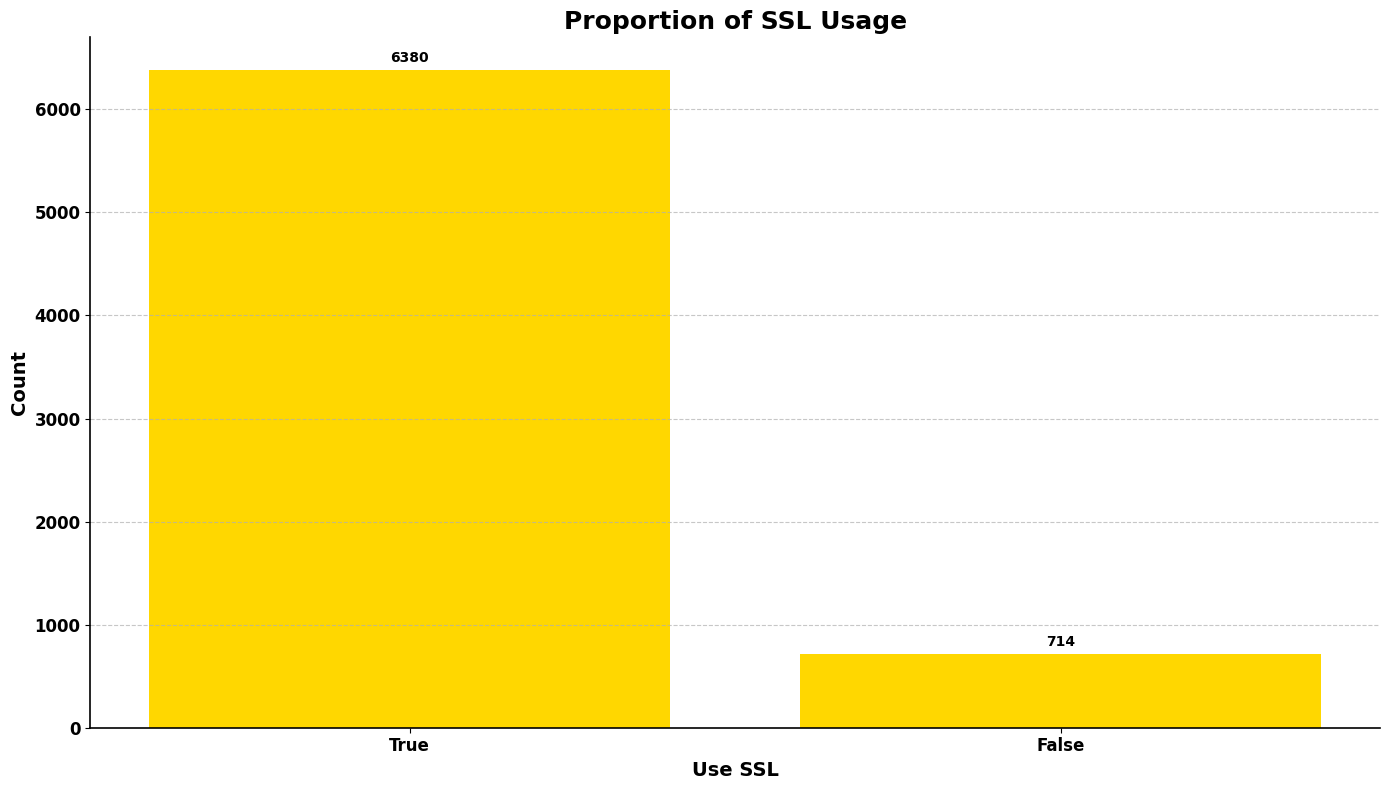

In [6]:
df['schema_use_ssl'] = df['schema'].apply(lambda x: json.loads(x).get('use_ssl', 'Unknown'))

ssl_distribution = df['schema_use_ssl'].value_counts()

ssl_distribution_df = ssl_distribution.reset_index()
ssl_distribution_df.columns = ['use_ssl', 'count']

ssl_distribution_df['use_ssl'] = ssl_distribution_df['use_ssl'].astype(str)

plt.figure(figsize=(14, 8))
bars = plt.bar(ssl_distribution_df['use_ssl'], ssl_distribution_df['count'], color='#FFD700')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontweight='bold')

plt.xlabel('Use SSL', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Proportion of SSL Usage', fontsize=18, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('none')  
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()


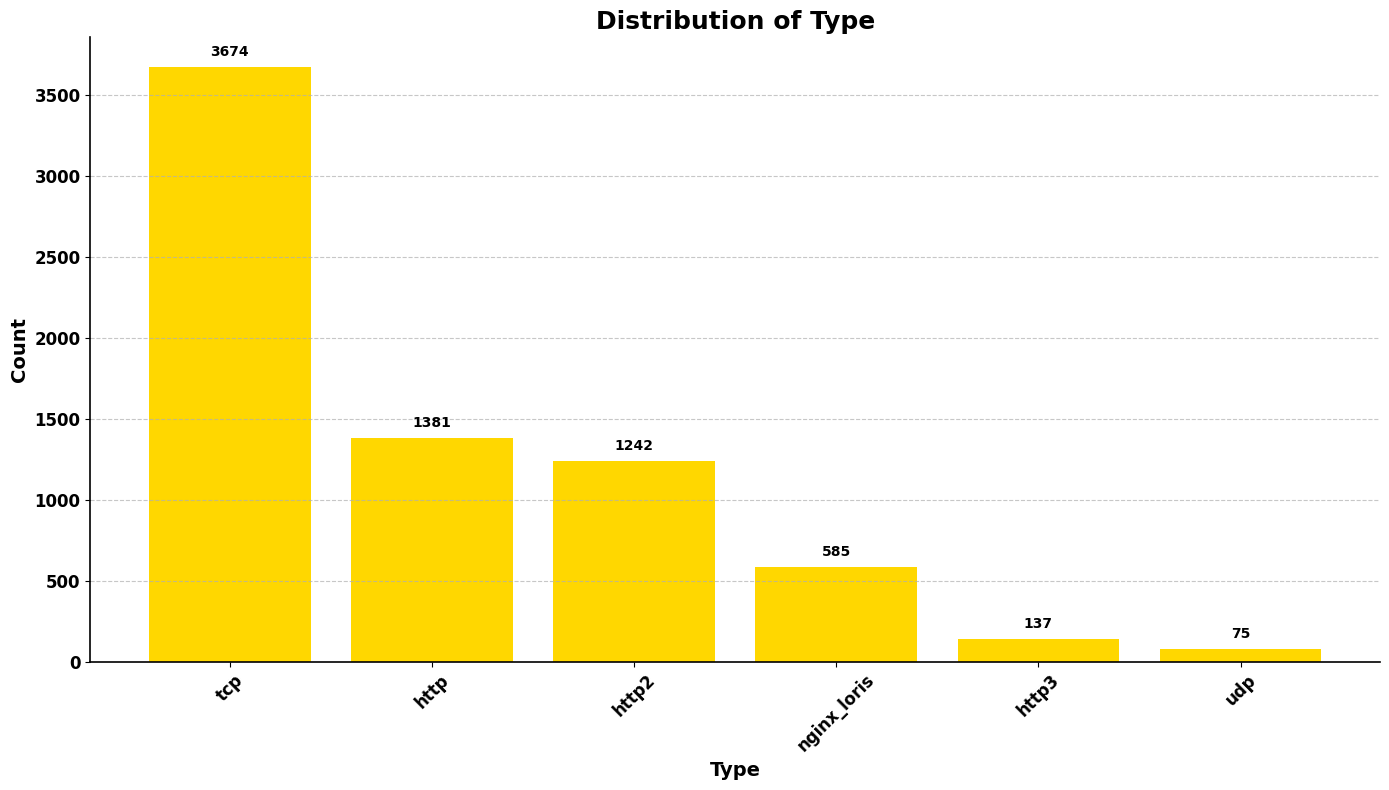

In [7]:
df['schema_type'] = df['schema'].apply(lambda x: json.loads(x).get('type', 'Unknown'))

method_distribution = df['schema_type'].value_counts()

method_distribution_df = method_distribution.reset_index()
method_distribution_df.columns = ['type', 'count']

plt.figure(figsize=(14, 8))

bars = plt.bar(method_distribution_df['type'], method_distribution_df['count'], color=AMARILLO)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontweight='bold')

plt.xlabel('Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Type', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()


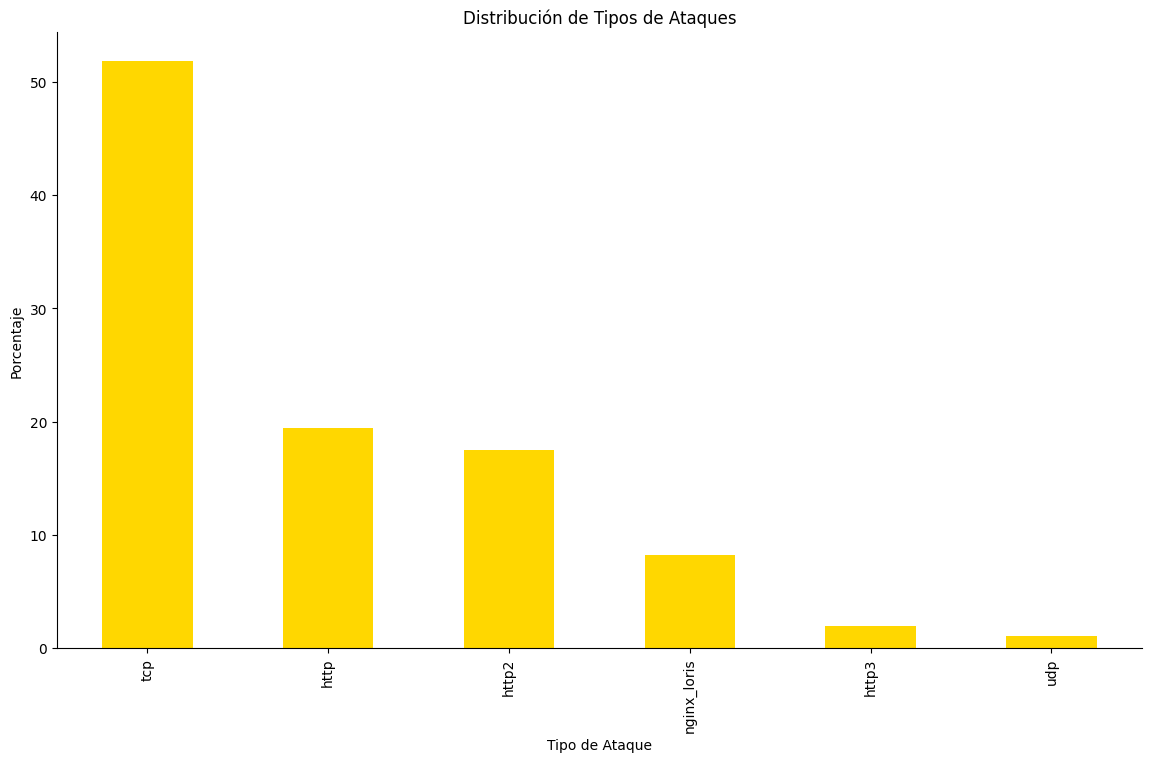

In [8]:
from urllib.parse import urlparse

df['schema_json'] = df['schema'].apply(json.loads)

flattened_df = pd.json_normalize(df['schema_json'])
flattened_df.head()

attack_types = flattened_df['type'].value_counts(normalize=True) * 100

plt.figure(figsize=(14, 8))
attack_types.plot(kind='bar', color=AMARILLO)
plt.title('Distribución de Tipos de Ataques')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de Ataque')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


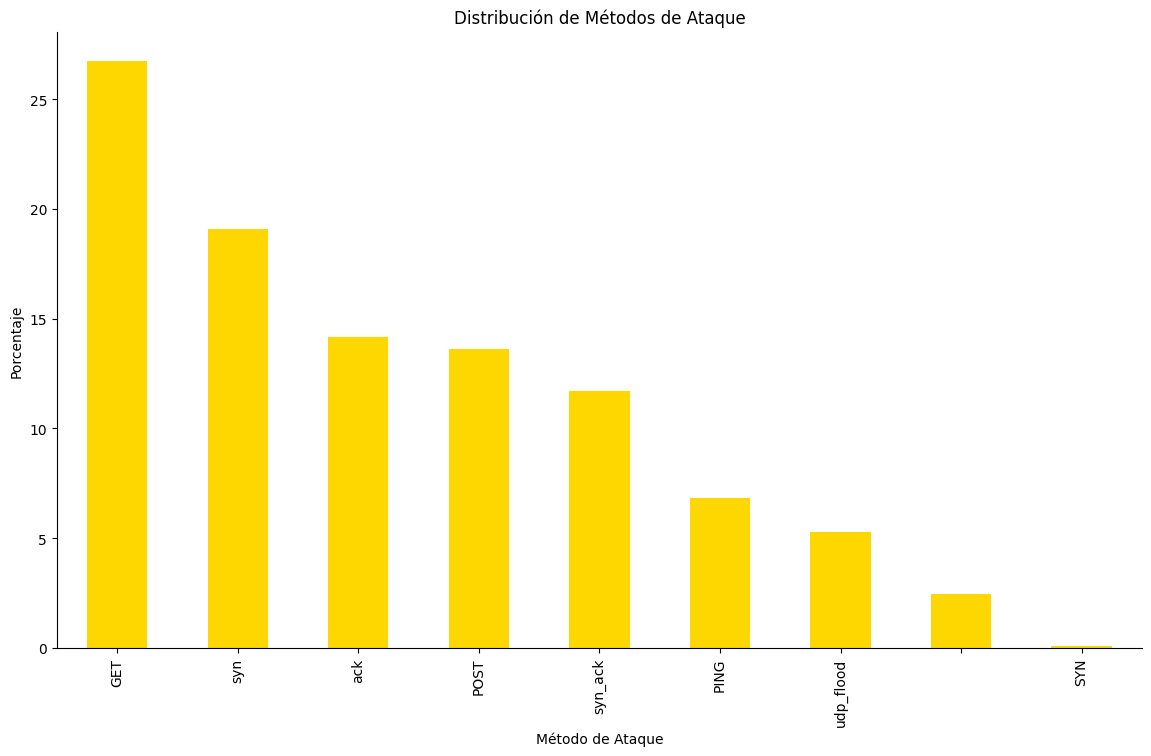

In [9]:
methods = flattened_df['method'].value_counts(normalize=True) * 100

plt.figure(figsize=(14, 8))
methods.plot(kind='bar', color=AMARILLO)
plt.title('Distribución de Métodos de Ataque')
plt.ylabel('Porcentaje')
plt.xlabel('Método de Ataque')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

com          70
es           65
ua           58
se           52
it           50
de           50
pl           30
fi           30
si           27
md           22
bg           16
org          10
eu            8
gr            7
nl            6
cz            3
eus           3
cat           3
fr            3
ch            3
at            2
uk            2
net           2
berlin        2
support       1
sener         1
stockholm     1
koeln         1
au            1
be            1
nrw           1
gal           1
il            1
37            1
sk            1
no            1
site          1
Name: tld, dtype: int64


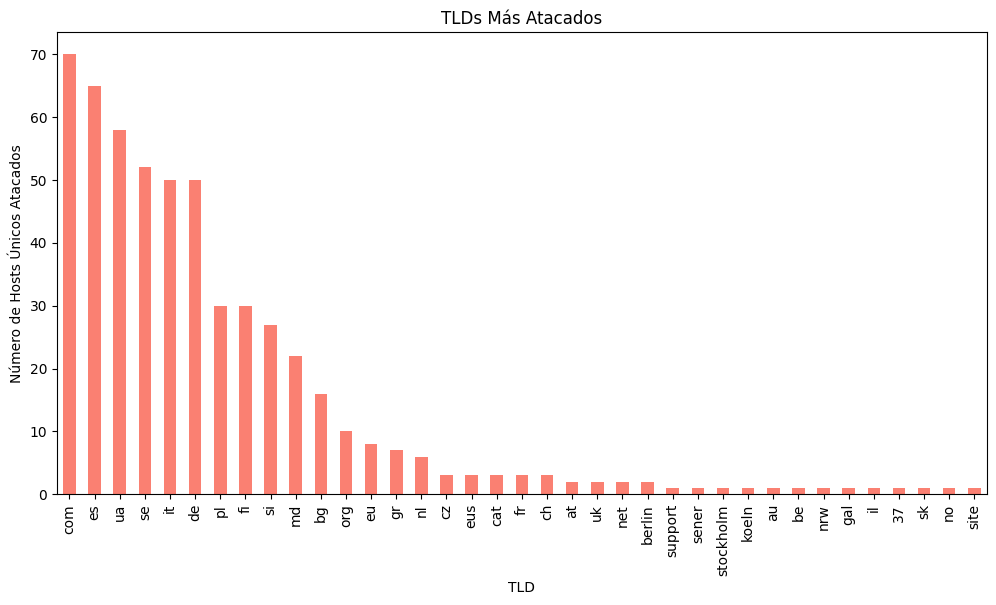

In [10]:
flattened_df['tld'] = flattened_df['host'].apply(lambda x: urlparse('http://' + x).netloc.split('.')[-1])

tld_counts = flattened_df.drop_duplicates(subset=['host'])['tld'].value_counts()
print(tld_counts)

plt.figure(figsize=(12, 6))
tld_counts.plot(kind='bar', color='salmon')
plt.title('TLDs Más Atacados')
plt.ylabel('Número de Hosts Únicos Atacados')
plt.xlabel('TLD')
plt.xticks(rotation=90)
plt.show()

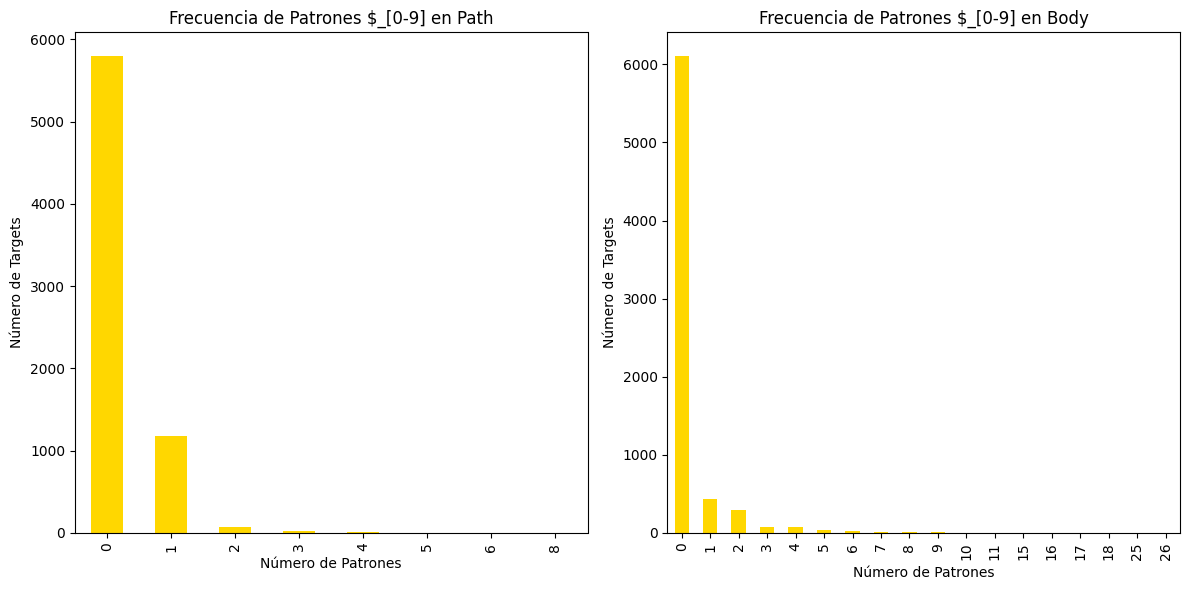

Estadísticas de patrones en Path:
0    5796
1    1180
2      73
3      26
4       8
5       4
6       5
8       2
Name: path_pattern_count, dtype: int64

Estadísticas de patrones en Body:
0     6105
1      430
2      291
3       73
4       75
5       44
6       21
7       14
8       14
9        9
10       6
11       5
15       1
16       1
17       2
18       1
25       1
26       1
Name: body_pattern_count, dtype: int64


In [11]:
import re

def count_pattern(pattern, text):
    if pd.isnull(text):
        return 0
    return len(re.findall(pattern, text))

pattern = r'\$_[0-9]'

flattened_df['path_pattern_count'] = flattened_df['path'].apply(lambda x: count_pattern(pattern, x))
flattened_df['body_pattern_count'] = flattened_df['body.value'].apply(lambda x: count_pattern(pattern, x))

path_pattern_stats = flattened_df['path_pattern_count'].value_counts().sort_index()
body_pattern_stats = flattened_df['body_pattern_count'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
path_pattern_stats.plot(kind='bar', color=AMARILLO)
plt.title('Frecuencia de Patrones $_[0-9] en Path')
plt.ylabel('Número de Targets')
plt.xlabel('Número de Patrones')

plt.subplot(1, 2, 2)
body_pattern_stats.plot(kind='bar', color=AMARILLO)
plt.title('Frecuencia de Patrones $_[0-9] en Body')
plt.ylabel('Número de Targets')
plt.xlabel('Número de Patrones')

plt.tight_layout()
plt.show()

print("Estadísticas de patrones en Path:")
print(path_pattern_stats)
print("\nEstadísticas de patrones en Body:")
print(body_pattern_stats)

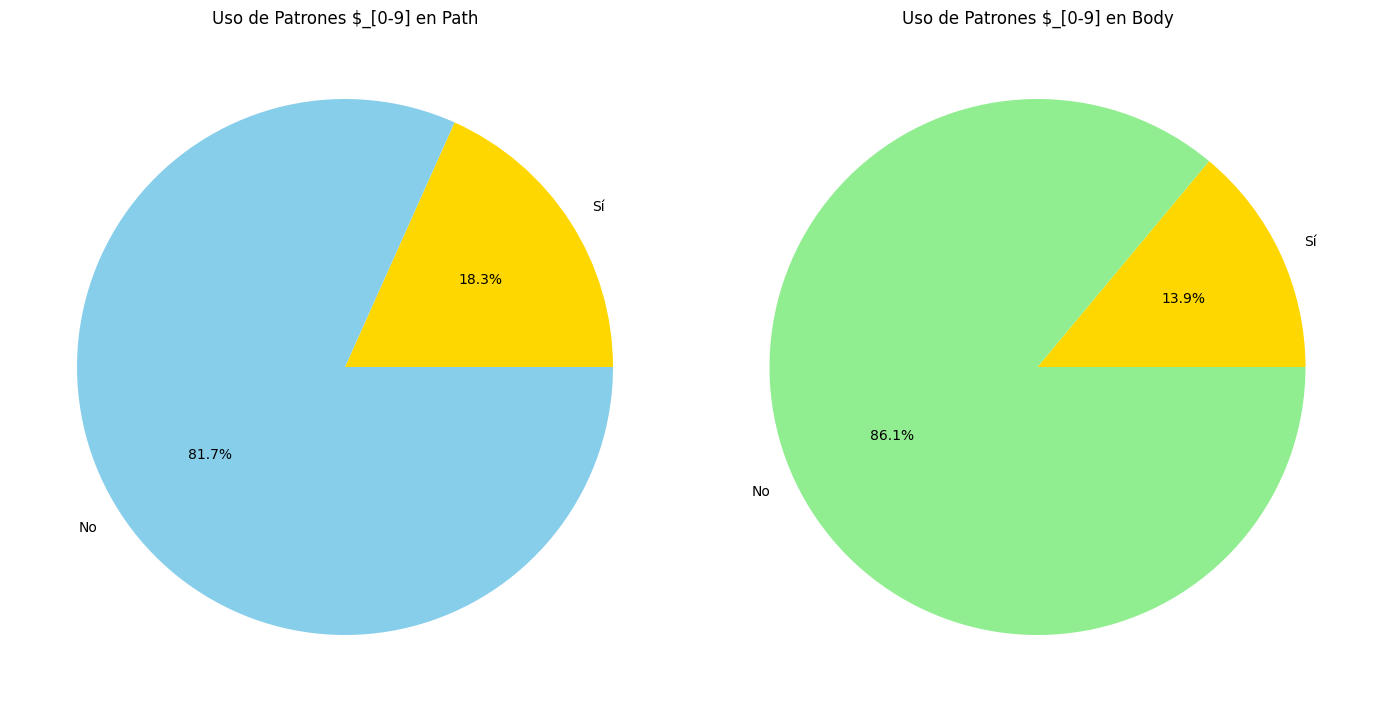

In [12]:

pattern_usage_df = pd.DataFrame({
    'Path Pattern Used': [flattened_df['path_pattern_count'].gt(0).sum(), flattened_df['path_pattern_count'].eq(0).sum()],
    'Body Pattern Used': [flattened_df['body_pattern_count'].gt(0).sum(), flattened_df['body_pattern_count'].eq(0).sum()]
}, index=['Sí', 'No'])


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
pattern_usage_df['Path Pattern Used'].plot(kind='pie', autopct='%1.1f%%', colors=[AMARILLO,'skyblue'])
plt.title('Uso de Patrones $_[0-9] en Path')
plt.ylabel('')


plt.subplot(1, 2, 2)
pattern_usage_df['Body Pattern Used'].plot(kind='pie', autopct='%1.1f%%', colors=[AMARILLO,'lightgreen'])
plt.title('Uso de Patrones $_[0-9] en Body')
plt.ylabel('')

plt.tight_layout()
plt.show()
